<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Anomaly_Detection_with_Isolation_Forest_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1-Introduction** [1]

Anomaly Detection means detecting unexpected events in the dataset which differ from the norm. Anomaly Detection is very often used in unlabeled data. There are two most important assumptions in the task of Anomaly Detection: the first assumption says that Anomalies occurs very rarely in data, and the second assumption is that the features differ from the normal instances significantly.

# **2-Data Exploration**[1]

In this article, I will take you through the problem of Anomaly Detection with Machine Learning. The dataset I will use in this article can be downloaded from here. Now let’s import the necessary libraries and have a quick look at some insights from the data:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

**Distribution of Sales**


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel("/content/drive/MyDrive/Datasets/Anmoly Detection/Sample - Superstore.xls")
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [ ]:
df.head()

In [ ]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

In [ ]:
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")
sns.despine()

The sales distribution in the dataset is very far from a normal distribution and it is also having a positive thin long tail. Most of the mass of the sales distribution is concentrated on the left side in the output above. It shows that the sales distribution exceeds the normal distribution.

# **Profit Distribution**



In [8]:
df['Profit'].describe()


count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

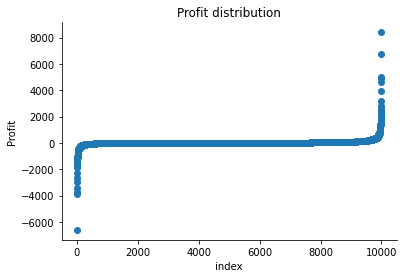

In [9]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

In [ ]:
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")
sns.despine()

The profit distribution of the data is resulting in both positive and negative tail. Although, the positive tail is longer than the negative tail. This shows that the profit distribution is skewed positively.

So we have now got two places where the data has very low probability to occur. One on the left and another on the right

# **Anomaly Detection of Sales**

In Machine Learning, Isolation Forest algorithm is used to detect the outliers that can return the anomaly scores of each instance. This algorithm is based on a tree-based model. In this algorithm, the splits are made by first selecting a random feature and then selecting a random value from the splits between the minimum and maximum values of the selected feature. Now let’s go through this algorithm:


In [ ]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

According to the above output, it looks like the sales that exceed 1000 would be considered as an outlier.



# **Referneces**
[[1] Anomaly Detection with Machine Learning](https://thecleverprogrammer.com/2020/07/29/anomaly-detection-with-machine-learning/)